## Supreme Court Project Guide

The ultimate goal of this project is to build a database of Supreme Court cases for 2016 that includes the dialogue from the oral arguments of each case. As we have seen in class the arguments were scraped from this page: https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx 

I have already downloaded and transformed the PDFs of the transcripts into text documents which you can download from courseworks: supreme_court_pdfs_txt.zip

There are three steps that you need to complete:

**Please note:** Step 3 is the most challenging--if you want to spend some time coding, you can skip Steps 1 and 2 and get to work on Step 3

**STEP 1:** scrape all of the case information available on this page: https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx 

This should include case name, docket number, etc--and most importantly the name of the PDF file. All of the text files share the exact same name as the PDF files they came from. This file name will allow you to connect your transcription data with your case data. 

It is up to you what kind Data structure you want to build. But it likely to be a list of lists, or list of dictionaries--for each case you will have a list or dictionary of the information you scrape from the webpage.

**STEP 2:** find a secondary source to scrape/integrate with your case data. The information on the Supreme Court page is very limited. You need to find a source or group of sources that ad information. The most important information would likely be: the decision, who voted for and against, and the state of origin of the case (for geocoding). You might think of other great things to put in there too! This information needs to be merged with the data you have from STEP 2.

**STEP 3:** use regular expressions to clean up and parse the text files so that you have a searchable data structure containing the dialog from the transcripts. 

From a data architecture perspective, you probably want to have a separate list for each case and in each list a data structure that pairs the speaker with what she/he says. Like:

`[['MR. BERGERON'," Yes. That's essentially the same thing"],[ 'JUSTICE SOTOMAYOR',' So how do you deal with Chambers?']]`

This is a list of lists --it could also be a list of dictionaries if you want it to be. The real programmatic challenge here is to clean up the text files and parse them successfully. Most of the instructions below are devoted to this, but Steps 1 and 2 are also extremely important.

Go step-by-step through this, and email me whenever you get stuck, and I will help. If you complete all the steps before Tuesday, email me if you want to go further.



### STEP 1
Scrape all of the necessary information from:

https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx 

You should result and a list of dictionaries for each case.

In [11]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib
import pandas as pd
%matplotlib inline

###Import your scraping libraries



In [12]:
raw_html = urlopen("https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx").read()
soup_doc = BeautifulSoup(raw_html, "html.parser")

In [13]:
soup_doc.title

<title>
	Argument Transcripts
</title>

In [14]:
my_table = soup_doc.find("table", attrs={"border": "1"})
my_table

<table border="1" cellpadding="2" cellspacing="0" class="table datatables">
<tr><td align="left" scope="col"><b>Argument Session: April 17, 2017 - April 26, 2017</b></td><td scope="col" style="text-align:center;"><b>Date Argued</b></td></tr><tr>
<td style="text-align:left">    <a href="argument_transcripts/2016/16-399_3f14.pdf" id="ctl00_ctl00_MainEditable_mainContent_rptTranscript_ctl01_hypFile" target="_blank">16-399. </a> <span id="ctl00_ctl00_MainEditable_mainContent_rptTranscript_ctl01_lblCName">Perry v. Merit Systems Protection Bd.</span></td>
<td style="text-align:center">04/17/17</td>
</tr>
<tr>
<td style="text-align:left">    <a href="argument_transcripts/2016/16-605_2dp3.pdf" id="ctl00_ctl00_MainEditable_mainContent_rptTranscript_ctl02_hypFile" target="_blank">16-605. </a> <span id="ctl00_ctl00_MainEditable_mainContent_rptTranscript_ctl02_lblCName">Town of Chester v. Laroe Estates, Inc.</span></td>
<td style="text-align:center">04/17/17</td>
</tr>
<tr>
<td style="text-align:l

In [15]:
my_table = soup_doc.find("table", attrs={"border": "1"})
cases = my_table.find_all('tr')

all_info = []
for case in cases:
   current = {}
   link = case.find_all('td')[0].find('a')
   case_name = case.find('span')
   case_date = case.find_all('td')[1].string
   docket_number = case.find_all('td')[0].find(target="_blank")
   if case_name:
       linkname=link['href'].split('/')[-1] 
       current['Script'] = linkname.split('.')[0]
       current['Case Name'] = case_name.string
       current['Date Argued'] = case_date
       current['Docket Number'] = docket_number.string.strip()
       
       all_info.append(current)
       #print(current)
       #print("-----")
all_info

[{'Case Name': 'Perry v. Merit Systems Protection Bd.',
  'Date Argued': '04/17/17',
  'Docket Number': '16-399.',
  'Script': '16-399_3f14'},
 {'Case Name': 'Town of Chester v. Laroe Estates, Inc.',
  'Date Argued': '04/17/17',
  'Docket Number': '16-605.',
  'Script': '16-605_2dp3'},
 {'Case Name': "California Public Employees' Retirement System v. ANZ Securities, Inc.",
  'Date Argued': '04/17/17',
  'Docket Number': '16-373.',
  'Script': '16-373_4e46'},
 {'Case Name': 'Kokesh v. SEC',
  'Date Argued': '04/18/17',
  'Docket Number': '16-529.',
  'Script': '16-529_21p3'},
 {'Case Name': 'Henson v. Santander Consumer USA Inc.',
  'Date Argued': '04/18/17',
  'Docket Number': '16-349.',
  'Script': '16-349_e29g'},
 {'Case Name': 'Trinity Lutheran Church of Columbia, Inc. v. Comer',
  'Date Argued': '04/19/17',
  'Docket Number': '15-577.',
  'Script': '15-577_l64n'},
 {'Case Name': 'Weaver v. Massachusetts',
  'Date Argued': '04/19/17',
  'Docket Number': '16-240.',
  'Script': '16-24

In [16]:
filenames =[]
for entries in all_info:
    filenames.append(entries['Script'])
filenames

['16-399_3f14',
 '16-605_2dp3',
 '16-373_4e46',
 '16-529_21p3',
 '16-349_e29g',
 '15-577_l64n',
 '16-240_nkp1',
 '16-5294_g314',
 '16-6219_7mio',
 '16-466_4g15',
 '16-405_9olb',
 '15-1039_bqm1',
 '16-309_b97c',
 '15-214_l6hn',
 '15-1031_6647',
 '15-457_gfbh',
 '15-1189_6468',
 '16-369_8nka',
 '16-254_7lio',
 '16-74_p8k0',
 '16-341_8njq',
 '16-327_d18e',
 '15-1503_3f14',
 '16-142_4gc5',
 '15-118_3e04',
 '15-1248_2dq3',
 '16-32_mlho',
 '15-1194_0861',
 '16-54_7l48',
 '15-9260_bq7c',
 '16-149_bodg',
 '15-1256_d1o2',
 '15-1500_5g68',
 '15-1391_5315',
 '15-1406_d1of',
 '15-827_gfbh',
 '15-1498_m647',
 '16-348_2cp3',
 '15-1293_o7jp',
 '15-1358_7648',
 '15-8544_c1o2',
 '15-797_f2q3',
 '15-1204_k536',
 '15-680_n648',
 '15-1262_l537',
 '14-1538_j4ek',
 '15-649_l5gm',
 '15-497_4g15',
 '15-866_j426',
 '15-513_k5fm',
 '15-927_6j37',
 '15-423_pnk0',
 '15-1251_q86b',
 '15-1111_ca7d',
 '14-1055_h3dj',
 '15-1191_igdj',
 '15-537_ljgm',
 '15-5991_21p3',
 '15-628_p86a',
 '15-8049_4f15',
 '14-9496_feah',


In [17]:
len(filenames)

64

In [92]:
firstdf=pd.DataFrame(all_info)
firstdf

,Case Name,Date Argued,Docket Number,Script
0,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14
1,"Town of Chester v. Laroe Estates, Inc.",04/17/17,16-605.,16-605_2dp3
2,California Public Employees' Retirement System...,04/17/17,16-373.,16-373_4e46
3,Kokesh v. SEC,04/18/17,16-529.,16-529_21p3
4,Henson v. Santander Consumer USA Inc.,04/18/17,16-349.,16-349_e29g
5,"Trinity Lutheran Church of Columbia, Inc. v. C...",04/19/17,15-577.,15-577_l64n
6,Weaver v. Massachusetts,04/19/17,16-240.,16-240_nkp1
7,McWilliams v. Dunn,04/24/17,16-5294.,16-5294_g314
8,Davila v. Davis,04/24/17,16-6219.,16-6219_7mio
9,Bristol-Myers Squibb Co. v. Superior Court of ...,04/25/17,16-466.,16-466_4g15


In [93]:
x= firstdf['Script'].unique()
x.sort()
x

array(['14-1055_h3dj', '14-1538_j4ek', '14-9496_feah', '15-1031_6647',
       '15-1039_bqm1', '15-1111_ca7d', '15-1189_6468', '15-118_3e04',
       '15-1191_igdj', '15-1194_0861', '15-1204_k536', '15-1248_2dq3',
       '15-1251_q86b', '15-1256_d1o2', '15-1262_l537', '15-1293_o7jp',
       '15-1358_7648', '15-1391_5315', '15-1406_d1of', '15-1498_m647',
       '15-1500_5g68', '15-1503_3f14', '15-214_l6hn', '15-423_pnk0',
       '15-457_gfbh', '15-497_4g15', '15-513_k5fm', '15-537_ljgm',
       '15-577_l64n', '15-5991_21p3', '15-606_5iel', '15-628_p86a',
       '15-649_l5gm', '15-680_n648', '15-7250_3eah', '15-777_1b82',
       '15-797_f2q3', '15-8049_4f15', '15-827_gfbh', '15-8544_c1o2',
       '15-866_j426', '15-9260_bq7c', '15-927_6j37', '16-142_4gc5',
       '16-149_bodg', '16-240_nkp1', '16-254_7lio', '16-309_b97c',
       '16-327_d18e', '16-32_mlho', '16-341_8njq', '16-348_2cp3',
       '16-349_e29g', '16-369_8nka', '16-373_4e46', '16-399_3f14',
       '16-405_9olb', '16-466_4g15', 

### STEP 2 
Scrape the additional source(s)

For this you need to do research and try to find a source that will give you useful information that you can add to the dictionary you created in Step 1.

In [22]:
#Look at spreadsheet with secondary source

### STEP 3
Here we go: the text files that were extracted from the PDFs are quite messy, you do not need to get them perfect, but you need to clean them up enough so that you can zone in on the arguments themselves. Below I take you step-by-step through what you need to do. In the end you want to have a separate list for each case that contains the speaker and the dialogue attached to that speaker.

**Step 1:** Download the text files from courseworks
Make sure they are locally on your computer. 
Open up the text files in a text editor like sublime, and carefully look at the problems with the files. How will you clean this up?

**Step 2:** Eventually you will want to loop through all of the text files and run the cleanup on all of them. But first just select one text file to open up and begin cleaning up.

In [23]:
#Import the regular expression library

In [94]:
#Open a text file from your computer
f = open('/Users/amandajames/Desktop/Group Project/14-1055_h3dj.txt', 'r')
sample_transcript = f.read()

In [95]:
#Take a look at the text file
#first get rid of "alderson reporting company" out of each one
#get rid of digits 1-25 
# \b[12?{1}]

sample_transcript 


'Official - Subject to Final Review\n1 1 IN THE SUPREME COURT OF THE UNITED STATES\n\n2 -----------------x\n\n3 CRYSTAL MONIQUE\n\n:\n\n4 LIGHTFOOT, ET AL.,\n\n:\n\n5\n\nPetitioners\n\n: No. 14-1055\n\n6 v.\n\n:\n\n7 CENDANT MORTGAGE\n\n:\n\n8 CORPORATION, DBA PHH\n\n:\n\n9 MORTGAGE, ET AL.,\n\n:\n\n10\n\nRespondents.\n\n:\n\n11 - - - - - - - - - - - - - - - - - x\n\n12 Washington, D.C.\n\n13 Tuesday, November 8, 2016\n\n14\n\n15 The above-entitled matter came on for oral\n\n16 argument before the Supreme Court of the United States\n\n17 at 11:04 a.m.\n\n18 APPEARANCES:\n\n19 E. JOSHUA ROSENKRANZ, ESQ., New York, N.Y.; on behalf of\n\n20 the Petitioners.\n\n21 ANN O\'CONNELL, ESQ., Assistant to the Solicitor General,\n\n22 Department of Justice, Washington, D.C.; for United\n\n23 States, as amicus curiae, supporting the Petitioners.\n\n24 BRIAN P. BROOKS, ESQ., Washington, D.C.; on behalf of\n\n25 the Respondents.\n\nAlderson Reporting Company\n\n\x0cOfficial - Subject to Final Review\

**How in the world are you going to clean this up?**
Take a close look and think about first what needs to be removed, and then needs to be isolated. You'll probably need the combination of regular expression (especially using subs() -- which is a regex replace), and simple splits -- where you split the text that point, and just keep the part of the text that you want. If you want to figure this on your own don't read any further--if you're starting to get stuck go a few cells down, and follow my hints.

Also take a look at the hint below--it might come in very handy...


In [96]:
#A note on regex splits:
# look at the difference between regex1 regex2
#A split using groups keeps the groups!!!!
import re

string = "Tomorrow and tomorrow and tomorrow"
regex1 = r"and" #not grouped
regex2 = r"(and)" #grouped
re.split(regex2,string)

['Tomorrow ', 'and', ' tomorrow ', 'and', ' tomorrow']

In [54]:
##Try to do everything yourself

#use a regex to clean up text file and get rid of top part: Alderson
# Company, repeated transcript, replace with nothing

#use findall and replace all with ''
# the part that says and 
# use regex sub gets rid of repeated text 

















### Cleaning comes first

A step-by-step way of Cleaning up this mess.

Step 1. You might notice that every page has:

`Alderson Reporting Company

Official - Subject to Final Review`
 
You want to get rid of that. I would use a regex sub() 

Step 2. **Line Numbers:** you might also notice these annoying line numbers going from 1 - 25 everywhere: I would use the regex sub() to get rid of this too -- but be very careful, you don't want to get rid of all the numbers in there. The cleaning doesn't have to be perfect, but try to get as many of them as you can without deleting other numbers.

Step 3 and 4. **chop off the beginning/ chop off the end**: now it would be very helpful to get rid of all of the text that comes before the arguments begins, and all the text that comes after the argument (each page has a really annoying index at the end that you don't want to be searching through). Look for words or phrases that uniquely repeat at the beginning and at the end of the arguments. The easiest way to isolate this, to do a simple split() on one of those phrases, and keep the half of The split you want. (Am I being too cryptic here?--a good split should give you list with two elements when you want to keep one of them) Think about it and email me.

Try to get these 4 cleaning actions to work step-by-step in the 4 cells below. As you go, I would assign each cleaner version of the text to a new variable. 

In [97]:
#1. Alderson company stuff
import re
import pandas as pd

string = "Tomorrow and tomorrow and tomorrow"
new=r"and"
clean1=re.sub(r"Alderson Reporting Company","", sample_transcript)
clean1
# sample_transcript= re.sub(r'^(\'Official -)(.*)(CHIEF)', sample_transcript, 'test')

'Official - Subject to Final Review\n1 1 IN THE SUPREME COURT OF THE UNITED STATES\n\n2 -----------------x\n\n3 CRYSTAL MONIQUE\n\n:\n\n4 LIGHTFOOT, ET AL.,\n\n:\n\n5\n\nPetitioners\n\n: No. 14-1055\n\n6 v.\n\n:\n\n7 CENDANT MORTGAGE\n\n:\n\n8 CORPORATION, DBA PHH\n\n:\n\n9 MORTGAGE, ET AL.,\n\n:\n\n10\n\nRespondents.\n\n:\n\n11 - - - - - - - - - - - - - - - - - x\n\n12 Washington, D.C.\n\n13 Tuesday, November 8, 2016\n\n14\n\n15 The above-entitled matter came on for oral\n\n16 argument before the Supreme Court of the United States\n\n17 at 11:04 a.m.\n\n18 APPEARANCES:\n\n19 E. JOSHUA ROSENKRANZ, ESQ., New York, N.Y.; on behalf of\n\n20 the Petitioners.\n\n21 ANN O\'CONNELL, ESQ., Assistant to the Solicitor General,\n\n22 Department of Justice, Washington, D.C.; for United\n\n23 States, as amicus curiae, supporting the Petitioners.\n\n24 BRIAN P. BROOKS, ESQ., Washington, D.C.; on behalf of\n\n25 the Respondents.\n\n\n\n\x0cOfficial - Subject to Final Review\n1 CONTENTS 2 ORAL ARGUMEN

In [98]:
clean2=re.sub(r"Official - Subject to Final Review","", clean1)
clean2

'\n1 1 IN THE SUPREME COURT OF THE UNITED STATES\n\n2 -----------------x\n\n3 CRYSTAL MONIQUE\n\n:\n\n4 LIGHTFOOT, ET AL.,\n\n:\n\n5\n\nPetitioners\n\n: No. 14-1055\n\n6 v.\n\n:\n\n7 CENDANT MORTGAGE\n\n:\n\n8 CORPORATION, DBA PHH\n\n:\n\n9 MORTGAGE, ET AL.,\n\n:\n\n10\n\nRespondents.\n\n:\n\n11 - - - - - - - - - - - - - - - - - x\n\n12 Washington, D.C.\n\n13 Tuesday, November 8, 2016\n\n14\n\n15 The above-entitled matter came on for oral\n\n16 argument before the Supreme Court of the United States\n\n17 at 11:04 a.m.\n\n18 APPEARANCES:\n\n19 E. JOSHUA ROSENKRANZ, ESQ., New York, N.Y.; on behalf of\n\n20 the Petitioners.\n\n21 ANN O\'CONNELL, ESQ., Assistant to the Solicitor General,\n\n22 Department of Justice, Washington, D.C.; for United\n\n23 States, as amicus curiae, supporting the Petitioners.\n\n24 BRIAN P. BROOKS, ESQ., Washington, D.C.; on behalf of\n\n25 the Respondents.\n\n\n\n\x0c\n1 CONTENTS 2 ORAL ARGUMENT OF 3 E. JOSHUA ROSENKRANZ, ESQ. 4 On behalf of the Petitioners\n\n

In [57]:
#2. Line numbers 1 - 25

clean3=re.sub(r"\b([1-9]|1[0-9]|2[0-5])\b"," ",clean2)
clean3

'\n    IN THE SUPREME COURT OF THE UNITED STATES\n\n  -----------------x\n\n  CRYSTAL MONIQUE\n\n:\n\n  LIGHTFOOT, ET AL.,\n\n:\n\n \n\nPetitioners\n\n: No.  -1055\n\n  v.\n\n:\n\n  CENDANT MORTGAGE\n\n:\n\n  CORPORATION, DBA PHH\n\n:\n\n  MORTGAGE, ET AL.,\n\n:\n\n \n\nRespondents.\n\n:\n\n  - - - - - - - - - - - - - - - - - x\n\n  Washington, D.C.\n\n  Tuesday, November  , 2016\n\n \n\n  The above-entitled matter came on for oral\n\n  argument before the Supreme Court of the United States\n\n  at  :04 a.m.\n\n  APPEARANCES:\n\n  E. JOSHUA ROSENKRANZ, ESQ., New York, N.Y.; on behalf of\n\n  the Petitioners.\n\n  ANN O\'CONNELL, ESQ., Assistant to the Solicitor General,\n\n  Department of Justice, Washington, D.C.; for United\n\n  States, as amicus curiae, supporting the Petitioners.\n\n  BRIAN P. BROOKS, ESQ., Washington, D.C.; on behalf of\n\n  the Respondents.\n\n\n\n\x0c\n  CONTENTS   ORAL ARGUMENT OF   E. JOSHUA ROSENKRANZ, ESQ.   On behalf of the Petitioners\n\n  \n\n ORAL ARGUME

In [58]:
#3. Chop off the beginning before the dialogue begins
#split the parts before and after the speech 
#chop off part 0 and then chop off part 1

clean4=re.split(r"(PROCEEDINGS)",clean3)
clean4

["\n    IN THE SUPREME COURT OF THE UNITED STATES\n\n  -----------------x\n\n  CRYSTAL MONIQUE\n\n:\n\n  LIGHTFOOT, ET AL.,\n\n:\n\n \n\nPetitioners\n\n: No.  -1055\n\n  v.\n\n:\n\n  CENDANT MORTGAGE\n\n:\n\n  CORPORATION, DBA PHH\n\n:\n\n  MORTGAGE, ET AL.,\n\n:\n\n \n\nRespondents.\n\n:\n\n  - - - - - - - - - - - - - - - - - x\n\n  Washington, D.C.\n\n  Tuesday, November  , 2016\n\n \n\n  The above-entitled matter came on for oral\n\n  argument before the Supreme Court of the United States\n\n  at  :04 a.m.\n\n  APPEARANCES:\n\n  E. JOSHUA ROSENKRANZ, ESQ., New York, N.Y.; on behalf of\n\n  the Petitioners.\n\n  ANN O'CONNELL, ESQ., Assistant to the Solicitor General,\n\n  Department of Justice, Washington, D.C.; for United\n\n  States, as amicus curiae, supporting the Petitioners.\n\n  BRIAN P. BROOKS, ESQ., Washington, D.C.; on behalf of\n\n  the Respondents.\n\n\n\n\x0c\n  CONTENTS   ORAL ARGUMENT OF   E. JOSHUA ROSENKRANZ, ESQ.   On behalf of the Petitioners\n\n  \n\n ORAL ARGUME

In [59]:
#4. Chop off the end after the dialogue ends

clean5=clean4[2]
clean5

'   ( :04 a.m.)   CHIEF JUSTICE ROBERTS: We will hear   argument next in Case No.  -1055, Lightfoot v. Cendant   Mortgage Corporation.   Mr. Rosenkranz.   ORAL ARGUMENT OF E. JOSHUA ROSENKRANZ   ON BEHALF OF THE PETITIONERS   MR. ROSENKRANZ: Thank you, Mr. Chief   Justice, and may it please the Court:   There is only one natural way to read the   language at issue here. A "court of competent   jurisdiction" is a court that has an independent source   of subject-matter jurisdiction. That is what this Court   has held five times those words mean. So let\'s start   with the plain language.   The statute grants Freddie, quote, "The   power in its corporate name to sue and be sued in any   \'court of competent jurisdiction,\' State or Federal."   The only reference to jurisdiction in that passage is to   say that you don\'t get to go to any Federal court or any   State court, but rather, you have to choose a court,   State or Federal, that must be a "court of competent   jurisdiction." And 

In [60]:
#Check your new variable to make sure it is clean
clean6=re.split(r"above-entitled",clean5)
clean6


['   ( :04 a.m.)   CHIEF JUSTICE ROBERTS: We will hear   argument next in Case No.  -1055, Lightfoot v. Cendant   Mortgage Corporation.   Mr. Rosenkranz.   ORAL ARGUMENT OF E. JOSHUA ROSENKRANZ   ON BEHALF OF THE PETITIONERS   MR. ROSENKRANZ: Thank you, Mr. Chief   Justice, and may it please the Court:   There is only one natural way to read the   language at issue here. A "court of competent   jurisdiction" is a court that has an independent source   of subject-matter jurisdiction. That is what this Court   has held five times those words mean. So let\'s start   with the plain language.   The statute grants Freddie, quote, "The   power in its corporate name to sue and be sued in any   \'court of competent jurisdiction,\' State or Federal."   The only reference to jurisdiction in that passage is to   say that you don\'t get to go to any Federal court or any   State court, but rather, you have to choose a court,   State or Federal, that must be a "court of competent   jurisdiction." And

In [61]:
clean7=clean6[0]
clean7

'   ( :04 a.m.)   CHIEF JUSTICE ROBERTS: We will hear   argument next in Case No.  -1055, Lightfoot v. Cendant   Mortgage Corporation.   Mr. Rosenkranz.   ORAL ARGUMENT OF E. JOSHUA ROSENKRANZ   ON BEHALF OF THE PETITIONERS   MR. ROSENKRANZ: Thank you, Mr. Chief   Justice, and may it please the Court:   There is only one natural way to read the   language at issue here. A "court of competent   jurisdiction" is a court that has an independent source   of subject-matter jurisdiction. That is what this Court   has held five times those words mean. So let\'s start   with the plain language.   The statute grants Freddie, quote, "The   power in its corporate name to sue and be sued in any   \'court of competent jurisdiction,\' State or Federal."   The only reference to jurisdiction in that passage is to   say that you don\'t get to go to any Federal court or any   State court, but rather, you have to choose a court,   State or Federal, that must be a "court of competent   jurisdiction." And 

In [63]:
clean7_2=re.sub(r"","", clean7)
clean7_2

'   ( :04 a.m.)   CHIEF JUSTICE ROBERTS: We will hear   argument next in Case No.  -1055, Lightfoot v. Cendant   Mortgage Corporation.   Mr. Rosenkranz.   ORAL ARGUMENT OF E. JOSHUA ROSENKRANZ   ON BEHALF OF THE PETITIONERS   MR. ROSENKRANZ: Thank you, Mr. Chief   Justice, and may it please the Court:   There is only one natural way to read the   language at issue here. A "court of competent   jurisdiction" is a court that has an independent source   of subject-matter jurisdiction. That is what this Court   has held five times those words mean. So let\'s start   with the plain language.   The statute grants Freddie, quote, "The   power in its corporate name to sue and be sued in any   \'court of competent jurisdiction,\' State or Federal."   The only reference to jurisdiction in that passage is to   say that you don\'t get to go to any Federal court or any   State court, but rather, you have to choose a court,   State or Federal, that must be a "court of competent   jurisdiction." And 

### Get your dialogue list
Now this transcription should be clean enough to get a list with every speaker, and what the speaker said. The pattern for the speakers is fairly obvious--my recommendation is to do a split using groups (like the example I show above with "tomorrow and tomorrow").

If you write your regular expression correctly: you should get a single list in which each element is either a speaker, or what was said.

In [64]:
#get a list of speaker and speech

clean8=re.split(r"([A-Z.\s]+:)", clean7)
del clean8[:3]
clean8


['   CHIEF JUSTICE ROBERTS:',
 ' We will hear   argument next in Case No.  -1055, Lightfoot v. Cendant   Mortgage Corporation.   Mr. Rosenkranz',
 '.   ORAL ARGUMENT OF E. JOSHUA ROSENKRANZ   ON BEHALF OF THE PETITIONERS   MR. ROSENKRANZ:',
 ' Thank you, Mr. Chief   Justice, and may it please the Court:   There is only one natural way to read the   language at issue here. A "court of competent   jurisdiction" is a court that has an independent source   of subject-matter jurisdiction. That is what this Court   has held five times those words mean. So let\'s start   with the plain language.   The statute grants Freddie, quote, "The   power in its corporate name to sue and be sued in any   \'court of competent jurisdiction,\' State or Federal."   The only reference to jurisdiction in that passage is to   say that you don\'t get to go to any Federal court or any   State court, but rather, you have to choose a court,   State or Federal, that must be a "court of competent   jurisdiction." An

### Make it a list of pairs
If you got your list the way I recommended to, it is just single list with elements after element--you need to figure out how to change it so you pair the speaker with what is said. Give it some thought, there are a few ways to try to do this. If you made it this far, you're doing great!

In [65]:
#make it a list of pairs of speaker and speech

full_list = list(zip(clean8[0::2], clean8[1::2]))
full_list
    



[('   CHIEF JUSTICE ROBERTS:',
  ' We will hear   argument next in Case No.  -1055, Lightfoot v. Cendant   Mortgage Corporation.   Mr. Rosenkranz'),
 ('.   ORAL ARGUMENT OF E. JOSHUA ROSENKRANZ   ON BEHALF OF THE PETITIONERS   MR. ROSENKRANZ:',
  ' Thank you, Mr. Chief   Justice, and may it please the Court:   There is only one natural way to read the   language at issue here. A "court of competent   jurisdiction" is a court that has an independent source   of subject-matter jurisdiction. That is what this Court   has held five times those words mean. So let\'s start   with the plain language.   The statute grants Freddie, quote, "The   power in its corporate name to sue and be sued in any   \'court of competent jurisdiction,\' State or Federal."   The only reference to jurisdiction in that passage is to   say that you don\'t get to go to any Federal court or any   State court, but rather, you have to choose a court,   State or Federal, that must be a "court of competent   jurisdiction

### Loop through all texts
If you made it this far--congratulations! 
The only thing left is to set up a loop that looks through all the texts and runs the cleanup and parsing when each one. You will need to have completed Step 1 in order to be able to do this loop because you will need the names to PDFs to do it. (Also each final list should also contain the PDF name, so you can reference it from your case database.)

In [99]:
# you could try here--Or email me with questions...
import pandas as pd
col_names = ['speaker','words']
df = pd.DataFrame.from_records(full_list, columns=col_names)
df.head()



,speaker,words
0,CHIEF JUSTICE ROBERTS:,We will hear argument next in Case No. -10...
1,. ORAL ARGUMENT OF E. JOSHUA ROSENKRANZ ON...,"Thank you, Mr. Chief Justice, and may it pl..."
2,. JUSTICE GINSBURG:,Does that include - you -- you said subject-...
3,MR. ROSENKRANZ:,I -- I am not limiting it to subject-matter...
4,.\n\n JUSTICE GINSBURG:,What did you do -- what\n\n does Justice Sou...


In [100]:
def parse_transcript(the_text):
    clean1=re.sub(r"Alderson Reporting Company","", the_text)
    clean2=re.sub(r"Official - Subject to Final Review","", clean1)
    clean3=re.sub(r"\b([1-9]|1[0-9]|2[0-5])\b"," ",clean2)
    clean4=re.split(r"(PROCEEDINGS)",clean3)
    clean5=clean4[2]
    clean6=re.split(r"above-entitled",clean5)
    clean7_2=re.sub(r"","", clean6[0])
    clean8=re.split(r"([A-Z.\s]+:)", clean7_2)
    del clean8[:3]
    full_list = list(zip(clean8[0::2], clean8[1::2]))
    return full_list



In [101]:
parse_transcript(sample_transcript)

[('   CHIEF JUSTICE ROBERTS:',
  ' We will hear   argument next in Case No.  -1055, Lightfoot v. Cendant   Mortgage Corporation.   Mr. Rosenkranz'),
 ('.   ORAL ARGUMENT OF E. JOSHUA ROSENKRANZ   ON BEHALF OF THE PETITIONERS   MR. ROSENKRANZ:',
  ' Thank you, Mr. Chief   Justice, and may it please the Court:   There is only one natural way to read the   language at issue here. A "court of competent   jurisdiction" is a court that has an independent source   of subject-matter jurisdiction. That is what this Court   has held five times those words mean. So let\'s start   with the plain language.   The statute grants Freddie, quote, "The   power in its corporate name to sue and be sued in any   \'court of competent jurisdiction,\' State or Federal."   The only reference to jurisdiction in that passage is to   say that you don\'t get to go to any Federal court or any   State court, but rather, you have to choose a court,   State or Federal, that must be a "court of competent   jurisdiction

In [102]:
filenames

['16-399_3f14',
 '16-605_2dp3',
 '16-373_4e46',
 '16-529_21p3',
 '16-349_e29g',
 '15-577_l64n',
 '16-240_nkp1',
 '16-5294_g314',
 '16-6219_7mio',
 '16-466_4g15',
 '16-405_9olb',
 '15-1039_bqm1',
 '16-309_b97c',
 '15-214_l6hn',
 '15-1031_6647',
 '15-457_gfbh',
 '15-1189_6468',
 '16-369_8nka',
 '16-254_7lio',
 '16-74_p8k0',
 '16-341_8njq',
 '16-327_d18e',
 '15-1503_3f14',
 '16-142_4gc5',
 '15-118_3e04',
 '15-1248_2dq3',
 '16-32_mlho',
 '15-1194_0861',
 '16-54_7l48',
 '15-9260_bq7c',
 '16-149_bodg',
 '15-1256_d1o2',
 '15-1500_5g68',
 '15-1391_5315',
 '15-1406_d1of',
 '15-827_gfbh',
 '15-1498_m647',
 '16-348_2cp3',
 '15-1293_o7jp',
 '15-1358_7648',
 '15-8544_c1o2',
 '15-797_f2q3',
 '15-1204_k536',
 '15-680_n648',
 '15-1262_l537',
 '14-1538_j4ek',
 '15-649_l5gm',
 '15-497_4g15',
 '15-866_j426',
 '15-513_k5fm',
 '15-927_6j37',
 '15-423_pnk0',
 '15-1251_q86b',
 '15-1111_ca7d',
 '14-1055_h3dj',
 '15-1191_igdj',
 '15-537_ljgm',
 '15-5991_21p3',
 '15-628_p86a',
 '15-8049_4f15',
 '14-9496_feah',


In [103]:
file_name_list = filenames
list_of_cases = []
path = '/Users/amandajames/Desktop/pdfs-4/'
for file_name in file_name_list:
    if file_name != '15-1358_7648' and file_name != '15-577_l64n' and file_name != '15-866_j426' and file_name != '16-32_mlho' and file_name!= '16-466_4g15' and file_name !='16-529_21p3':
        f = open(path + file_name + '.txt', 'r')
        sample_transcript = f.read()
        this_list = parse_transcript(sample_transcript)   
        better_list = []
        for each in this_list:
            entry = list(each)
            entry.append(file_name)
            better_list.append(entry)
        this_list.append(file_name)
        list_of_cases.extend(better_list)



In [104]:
len(list_of_cases)

12237

In [105]:
import pandas as pd
col_names = ['speaker','words','filenames']
df2 = pd.DataFrame.from_records(list_of_cases, columns=col_names)
df2.head()

,speaker,words,filenames
0,CHIEF JUSTICE ROBERTS:,We'll hear argument first this morning in C...,16-399_3f14
1,. ORAL ARGUMENT OF CHRISTOPHER LANDAU ON B...,"Thank you, Mr. Chief Justice, and may it pl...",16-399_3f14
2,.\n\n JUSTICE SOTOMAYOR:,I'm sorry --,16-399_3f14
3,\n\n JUSTICE KENNEDY:,Just -- just as an\n\n introductory question...,16-399_3f14
4,\n\n MR. LANDAU:,"I don't think they will be able\n\n to, Your...",16-399_3f14


In [106]:
combined_df = df2.merge(firstdf, left_on='filenames', right_on='Script')
combined_df

,speaker,words,filenames,Case Name,Date Argued,Docket Number,Script
0,CHIEF JUSTICE ROBERTS:,We'll hear argument first this morning in C...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14
1,. ORAL ARGUMENT OF CHRISTOPHER LANDAU ON B...,"Thank you, Mr. Chief Justice, and may it pl...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14
2,.\n\n JUSTICE SOTOMAYOR:,I'm sorry --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14
3,\n\n JUSTICE KENNEDY:,Just -- just as an\n\n introductory question...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14
4,\n\n MR. LANDAU:,"I don't think they will be able\n\n to, Your...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14
5,.\n\n \n\n JUSTICE KENNEDY:,Certainly --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14
6,\n\n JUSTICE GINSBURG:,But the district court\n\n couldn't resolve ...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14
7,\n\n MR. LANDAU:,"Well, you raise an interesting\n\n question,...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14
8,\n\n JUSTICE GINSBURG:,The government -- the\n\n government takes t...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14
9,.\n\n MR. LANDAU:,"It could take that position,\n\n\n\n \n Yo...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14


In [107]:
combined_df.shape

(12237, 7)

In [110]:
# for row in combined_df:
#     number=len(row['words'].split( ))
#     number
    

In [111]:
def name(anything):
    docketfixed= re.sub(r"\.",'',anything)
    return docketfixed

combined_df['Docket Number2']= combined_df['Docket Number'].apply(name)
combined_df

,speaker,words,filenames,Case Name,Date Argued,Docket Number,Script,Docket Number2
0,CHIEF JUSTICE ROBERTS:,We'll hear argument first this morning in C...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
1,. ORAL ARGUMENT OF CHRISTOPHER LANDAU ON B...,"Thank you, Mr. Chief Justice, and may it pl...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
2,.\n\n JUSTICE SOTOMAYOR:,I'm sorry --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
3,\n\n JUSTICE KENNEDY:,Just -- just as an\n\n introductory question...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
4,\n\n MR. LANDAU:,"I don't think they will be able\n\n to, Your...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
5,.\n\n \n\n JUSTICE KENNEDY:,Certainly --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
6,\n\n JUSTICE GINSBURG:,But the district court\n\n couldn't resolve ...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
7,\n\n MR. LANDAU:,"Well, you raise an interesting\n\n question,...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
8,\n\n JUSTICE GINSBURG:,The government -- the\n\n government takes t...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
9,.\n\n MR. LANDAU:,"It could take that position,\n\n\n\n \n Yo...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399


In [112]:
# del combined_df['Docket Number']
combined_df.columns

Index(['speaker', 'words', 'filenames', 'Case Name', 'Date Argued',
       'Docket Number', 'Script', 'Docket Number2'],
      dtype='object')

In [113]:
combined_df

,speaker,words,filenames,Case Name,Date Argued,Docket Number,Script,Docket Number2
0,CHIEF JUSTICE ROBERTS:,We'll hear argument first this morning in C...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
1,. ORAL ARGUMENT OF CHRISTOPHER LANDAU ON B...,"Thank you, Mr. Chief Justice, and may it pl...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
2,.\n\n JUSTICE SOTOMAYOR:,I'm sorry --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
3,\n\n JUSTICE KENNEDY:,Just -- just as an\n\n introductory question...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
4,\n\n MR. LANDAU:,"I don't think they will be able\n\n to, Your...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
5,.\n\n \n\n JUSTICE KENNEDY:,Certainly --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
6,\n\n JUSTICE GINSBURG:,But the district court\n\n couldn't resolve ...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
7,\n\n MR. LANDAU:,"Well, you raise an interesting\n\n question,...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
8,\n\n JUSTICE GINSBURG:,The government -- the\n\n government takes t...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399
9,.\n\n MR. LANDAU:,"It could take that position,\n\n\n\n \n Yo...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399


In [114]:
def name(anything):
    fixed1= re.sub(r"\n",'',anything)
    fixed2= re.sub(r"\.",'',fixed1)
    fixed3= re.sub(r":",'',fixed2)
    return fixed3

combined_df['fixed_name']= combined_df['speaker'].apply(name).str.strip()
combined_df

,speaker,words,filenames,Case Name,Date Argued,Docket Number,Script,Docket Number2,fixed_name
0,CHIEF JUSTICE ROBERTS:,We'll hear argument first this morning in C...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,CHIEF JUSTICE ROBERTS
1,. ORAL ARGUMENT OF CHRISTOPHER LANDAU ON B...,"Thank you, Mr. Chief Justice, and may it pl...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,ORAL ARGUMENT OF CHRISTOPHER LANDAU ON BEHAL...
2,.\n\n JUSTICE SOTOMAYOR:,I'm sorry --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE SOTOMAYOR
3,\n\n JUSTICE KENNEDY:,Just -- just as an\n\n introductory question...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE KENNEDY
4,\n\n MR. LANDAU:,"I don't think they will be able\n\n to, Your...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,MR LANDAU
5,.\n\n \n\n JUSTICE KENNEDY:,Certainly --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE KENNEDY
6,\n\n JUSTICE GINSBURG:,But the district court\n\n couldn't resolve ...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE GINSBURG
7,\n\n MR. LANDAU:,"Well, you raise an interesting\n\n question,...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,MR LANDAU
8,\n\n JUSTICE GINSBURG:,The government -- the\n\n government takes t...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE GINSBURG
9,.\n\n MR. LANDAU:,"It could take that position,\n\n\n\n \n Yo...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,MR LANDAU


In [115]:


def number(some_string):
    return len(some_string.split( ))

# df['number_words'][1] = number(combined_df['words'][2])

combined_df['number_words']= combined_df['words'].apply(number)
combined_df

,speaker,words,filenames,Case Name,Date Argued,Docket Number,Script,Docket Number2,fixed_name,number_words
0,CHIEF JUSTICE ROBERTS:,We'll hear argument first this morning in C...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,CHIEF JUSTICE ROBERTS,18
1,. ORAL ARGUMENT OF CHRISTOPHER LANDAU ON B...,"Thank you, Mr. Chief Justice, and may it pl...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,ORAL ARGUMENT OF CHRISTOPHER LANDAU ON BEHAL...,227
2,.\n\n JUSTICE SOTOMAYOR:,I'm sorry --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE SOTOMAYOR,3
3,\n\n JUSTICE KENNEDY:,Just -- just as an\n\n introductory question...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE KENNEDY,71
4,\n\n MR. LANDAU:,"I don't think they will be able\n\n to, Your...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,MR LANDAU,35
5,.\n\n \n\n JUSTICE KENNEDY:,Certainly --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE KENNEDY,2
6,\n\n JUSTICE GINSBURG:,But the district court\n\n couldn't resolve ...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE GINSBURG,60
7,\n\n MR. LANDAU:,"Well, you raise an interesting\n\n question,...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,MR LANDAU,86
8,\n\n JUSTICE GINSBURG:,The government -- the\n\n government takes t...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE GINSBURG,33
9,.\n\n MR. LANDAU:,"It could take that position,\n\n\n\n \n Yo...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,MR LANDAU,156


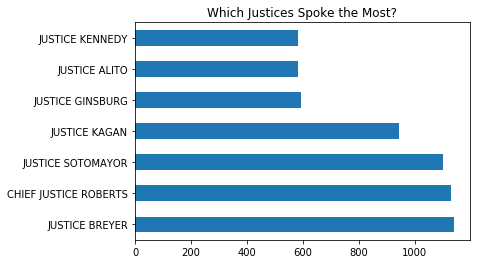

In [170]:
combined_df['fixed_name'].value_counts().head(7).plot(kind='barh', title='Which Justices Spoke the Most?')

In [164]:
combined_df.groupby('Docket Number2')['fixed_name'].value_counts()
# find sum, group by speaker

Docket Number2  fixed_name                                                                           
14-1055         MR BROOKS                                                                                29
                JUSTICE BREYER                                                                           25
                CONNELL                                                                                  21
                MR ROSENKRANZ                                                                            19
                JUSTICE SOTOMAYOR                                                                        16
                JUSTICE GINSBURG                                                                         14
                CHIEF JUSTICE ROBERTS                                                                    13
                JUSTICE KENNEDY                                                                           2
                                  

In [116]:
from collections import Counter
import re
#https://docs.python.org/2/library/collections.html
wordcount = combined_df.groupby(["Case Name","fixed_name"])['words'].sum().apply(lambda words: Counter(re.findall(r"\b\w{6,}\b",words.lower())).most_common())
wordcount.reset_index()



,Case Name,fixed_name,words
0,Advocate Health Care Network v. Stapleton,,[]
1,Advocate Health Care Network v. Stapleton,A JUSTICE KAGAN,"[(maintained, 2), (repeat, 1), (requirement, 1..."
2,Advocate Health Care Network v. Stapleton,CHIEF JUSTICE ROBERTS,"[(church, 19), (agency, 7), (agencies, 6), (sa..."
3,Advocate Health Care Network v. Stapleton,JUSTICE ALITO,"[(provision, 9), (responsible, 7), (church, 6)..."
4,Advocate Health Care Network v. Stapleton,JUSTICE BREYER,"[(little, 7), (sisters, 6), (church, 5), (real..."
5,Advocate Health Care Network v. Stapleton,JUSTICE GINSBURG,"[(principal, 3), (purpose, 3), (organization, ..."
6,Advocate Health Care Network v. Stapleton,JUSTICE KAGAN,"[(church, 6), (criteria, 5), (language, 3), (r..."
7,Advocate Health Care Network v. Stapleton,JUSTICE KENNEDY,"[(letters, 6), (congress, 4), (hundreds, 3), (..."
8,Advocate Health Care Network v. Stapleton,JUSTICE SOTOMAYOR,"[(church, 10), (maintained, 6), (established, ..."
9,Advocate Health Care Network v. Stapleton,MR FELDMAN,"[(church, 51), (actually, 24), (employees, 22)..."


In [117]:
# combined_df['word count'] = combined_df['words'].apply(lambda x: len(x.split()))
# combined_df


In [178]:
combined_df.groupby('Case Name')['number_words'].sum().sort_values(ascending=False).head(5).reset_index()

,Case Name,number_words
0,Murr v. Wisconsin,13286
1,Jennings v. Rodriguez,12442
2,McCrory v. Harris,11872
3,Expressions Hair Design v. Schneiderman,11849
4,Honeycutt v. United States,11784


In [119]:
combined_df.groupby('Case Name')['number_words'].sum().sort_values(ascending=False)

Case Name
Murr v. Wisconsin                                                           13286
Jennings v. Rodriguez                                                       12442
McCrory v. Harris                                                           11872
Expressions Hair Design v. Schneiderman                                     11849
Honeycutt v. United States                                                  11784
Microsoft Corp. v. Baker                                                    11761
Lee v. United States                                                        11629
Endrew F. v. Douglas County School Dist. RE-1                               11606
Town of Chester v. Laroe Estates, Inc.                                      11575
Fry v. Napoleon Community Schools                                           11547
Midland Funding, LLC v. Johnson                                             11545
Perry v. Merit Systems Protection Bd.                                       11492
Sandoz

In [120]:
combined_df.groupby('fixed_name')['number_words'].sum().sort_values(ascending=False)
# how much did Clarence Thomas say?



fixed_name
JUSTICE BREYER                                                                  49502
JUSTICE KAGAN                                                                   39661
CHIEF JUSTICE ROBERTS                                                           31656
JUSTICE SOTOMAYOR                                                               31452
JUSTICE ALITO                                                                   22391
JUSTICE GINSBURG                                                                18176
JUSTICE KENNEDY                                                                 15409
MR KATYAL                                                                       14499
MR FISHER                                                                       13493
MR WAXMAN                                                                       12793
MR CLEMENT                                                                      10549
MR DREEBEN                                 

In [121]:
# combined_df[combined_df['fixed_name']=='JUSTICE THOMAS']


In [123]:
df3=pd.read_excel('/Users/amandajames/Desktop/Group Project/Supreme Court State Information.xlsx')
df3

,Docket Number,State,Date Argued,Date Decided,Area*,Decision,Status,Court Leaning,Previous Court,City,Latitude,Longitude,Unnamed: 12
0,14-1055,California,2016-06-28,2017-01-18 00:00:00,Economic Activity,8-0,affirmed,Major Majority,9th Circuit,"Pasadena, California",34.147785,-118.144516,NaN
1,14-1538,Wisconsin,2016-06-27,2017-02-22 00:00:00,Economic Activity,7-0,reversed,Major Majority,District Court for the Western District of Wis...,"Madison, Wisconsin",43.073052,-89.401230,NaN
2,14-9496,Illinois,2016-01-15,2017-03-21 00:00:00,Civil Rights,2017-06-02 00:00:00,affirmed,Major Majority,7th Circuit,"Joilet, Illinois",41.525031,-88.081725,NaN
3,15-118,Texas,2016-10-11,2017-06-26 00:00:00,Immigration,NaN,vacated,Vacated,5th Circuit,"San Antonio, Texas",29.424122,-98.493628,NaN
4,15-214,Wisconsin,2016-01-15,2017-06-23 00:00:00,Economic Activity,2017-05-03 00:00:00,affirmed,Liberal,Wisconsin Court Of Appeals District III,"St. Croix County, Wisconsin",45.049784,-92.387569,NaN
5,15-423,"Washington, D.C.",2016-06-28,2017-05-01 00:00:00,Economic Activity,8-0,reversed,Major Majority,United States District Court for the District ...,"Washington, D.C.",38.907192,-77.036871,NaN
6,15-457,California,2016-01-15,2017-06-12 00:00:00,Economic Activity,8-0,reversed,Major Majority,9th Circuit,"Seattle, Washington",47.606209,-122.332071,NaN
7,15-497,Michigan,2016-06-28,2017-02-22 00:00:00,Civil Rights,8-0,affirmed,Major Majority,6th Circuit,"Detriot, Michigan",42.331427,-83.045754,NaN
8,15-513,Louisiana,2016-11-01,Pending,Economic Activity,8-0,reversed,Major Majority,5th Circuit,"Gulf Port, Mississippi",30.367420,-89.092816,NaN
9,15-537,Puerto Rico,2016-10-04,2016-11-29 00:00:00,Criminal Procedure,8-0,reversed,Major Majority,1st Circuit,Puerto Rico,18.220833,-66.590149,NaN


In [124]:
df_states = combined_df.merge(df3, left_on='Docket Number2', right_on='Docket Number')
df_states



,speaker,words,filenames,Case Name,Date Argued_x,Docket Number_x,Script,Docket Number2,fixed_name,number_words,...,Date Decided,Area*,Decision,Status,Court Leaning,Previous Court,City,Latitude,Longitude,Unnamed: 12
0,CHIEF JUSTICE ROBERTS:,We'll hear argument first this morning in C...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,CHIEF JUSTICE ROBERTS,18,...,2017-06-23 00:00:00,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN
1,. ORAL ARGUMENT OF CHRISTOPHER LANDAU ON B...,"Thank you, Mr. Chief Justice, and may it pl...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,ORAL ARGUMENT OF CHRISTOPHER LANDAU ON BEHAL...,227,...,2017-06-23 00:00:00,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN
2,.\n\n JUSTICE SOTOMAYOR:,I'm sorry --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE SOTOMAYOR,3,...,2017-06-23 00:00:00,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN
3,\n\n JUSTICE KENNEDY:,Just -- just as an\n\n introductory question...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE KENNEDY,71,...,2017-06-23 00:00:00,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN
4,\n\n MR. LANDAU:,"I don't think they will be able\n\n to, Your...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,MR LANDAU,35,...,2017-06-23 00:00:00,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN
5,.\n\n \n\n JUSTICE KENNEDY:,Certainly --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE KENNEDY,2,...,2017-06-23 00:00:00,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN
6,\n\n JUSTICE GINSBURG:,But the district court\n\n couldn't resolve ...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE GINSBURG,60,...,2017-06-23 00:00:00,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN
7,\n\n MR. LANDAU:,"Well, you raise an interesting\n\n question,...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,MR LANDAU,86,...,2017-06-23 00:00:00,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN
8,\n\n JUSTICE GINSBURG:,The government -- the\n\n government takes t...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE GINSBURG,33,...,2017-06-23 00:00:00,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN
9,.\n\n MR. LANDAU:,"It could take that position,\n\n\n\n \n Yo...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,MR LANDAU,156,...,2017-06-23 00:00:00,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN


In [182]:
df_states.columns

Index(['speaker', 'words', 'filenames', 'Case Name', 'Date Argued_x',
       'Docket Number_x', 'Script', 'Docket Number2', 'fixed_name',
       'number_words', 'Docket Number_y', 'State', 'Date Argued_y',
       'Date Decided ', 'Area*', 'Decision', 'Status', 'Court Leaning',
       'Previous Court', 'City', 'Latitude', 'Longitude', 'Unnamed: 12',
       'Docket Number'],
      dtype='object')

In [181]:
# df_states.groupby('Docket Number2', 'fixed_name')['number_words']

In [125]:
df4=df_states.groupby(['City','Docket Number2', 'Area*','Case Name','Latitude','Longitude'])['number_words'].sum().sort_values(ascending=False).reset_index()
df4
# combined_df.groupby('fixed_name')['number_words'].sum().sort_values(ascending=False)

,City,Docket Number2,Area*,Case Name,Latitude,Longitude,number_words
0,"St. Croix County, Wisconsin",15-214,Economic Activity,Murr v. Wisconsin,45.049784,-92.387569,13286
1,"Pasadena, California",15-1204,Immigration,Jennings v. Rodriguez,34.147785,-118.144516,12442
2,"Raleigh, North Carolina",15-1262,Civil Rights,McCrory v. Harris,35.779590,-78.638179,11872
3,"New York, New York",15-1391,Economic Activity,Expressions Hair Design v. Schneiderman,40.712784,-74.005941,11849
4,"Chattanooga, Tennessee",16-142,Criminal Procedure,Honeycutt v. United States,35.045630,-85.309680,11784
5,"Seattle, Washington",15-457,Economic Activity,Microsoft Corp. v. Baker,47.606209,-122.332071,11761
6,"Memphis, Tennessee",16-327,Criminal Procedure,Lee v. United States,35.149534,-90.048980,11629
7,"Castle Rock, Colorado",15-827,Civil Rights,Endrew F. v. Douglas County School Dist. RE-1,39.372212,-104.856090,11606
8,"Chester, New York",16-605,Judicial Power,"Town of Chester v. Laroe Estates, Inc.",41.362594,-74.271261,11575
9,"Detriot, Michigan",15-497,Civil Rights,Fry v. Napoleon Community Schools,42.331427,-83.045754,11547


In [126]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
def make_point(row):
    return Point(row.Longitude, row.Latitude)
points=df4.apply(lambda row:Point(row.Longitude, row.Latitude),axis=1)
speeches=gpd.GeoDataFrame(df4, geometry=points)
speeches.crs={'init': 'epsg:4326'}
speeches.head()

,City,Docket Number2,Area*,Case Name,Latitude,Longitude,number_words,geometry
0,"St. Croix County, Wisconsin",15-214,Economic Activity,Murr v. Wisconsin,45.049784,-92.387569,13286,POINT (-92.387569 45.049784)
1,"Pasadena, California",15-1204,Immigration,Jennings v. Rodriguez,34.147785,-118.144516,12442,POINT (-118.144516 34.147785)
2,"Raleigh, North Carolina",15-1262,Civil Rights,McCrory v. Harris,35.779590,-78.638179,11872,POINT (-78.63817899999999 35.77959)
3,"New York, New York",15-1391,Economic Activity,Expressions Hair Design v. Schneiderman,40.712784,-74.005941,11849,POINT (-74.00594100000001 40.712784)
4,"Chattanooga, Tennessee",16-142,Criminal Procedure,Honeycutt v. United States,35.045630,-85.309680,11784,POINT (-85.30968 35.04563)


In [127]:
speeches.to_file('supremecourt.geojson',driver='GeoJSON')

In [128]:
combined_df[combined_df['fixed_name'].str.contains('THOMAS')]

,speaker,words,filenames,Case Name,Date Argued,Docket Number,Script,Docket Number2,fixed_name,number_words
538,. ORAL ARGUMENT OF THOMAS C. GOLDSTEIN ON ...,Mr. Chief Justice and may it please the Cou...,16-373_4e46,California Public Employees' Retirement System...,04/17/17,16-373.,16-373_4e46,16-373,ORAL ARGUMENT OF THOMAS C GOLDSTEIN ON BEHAL...,217
731,. REBUTTAL ARGUMENT OF THOMAS C. GOLDSTEIN ...,Thank you. Two basic\n\n\n \n58 points. The...,16-373_4e46,California Public Employees' Retirement System...,04/17/17,16-373.,16-373_4e46,16-373,REBUTTAL ARGUMENT OF THOMAS C GOLDSTEIN ON B...,539


In [129]:
from collections import Counter
import re
#https://docs.python.org/2/library/collections.html
wordcount = combined_df.groupby(["Case Name","fixed_name"])['words'].sum().apply(lambda words: Counter(re.findall(r"\b\w{6,}\b",words.lower())).most_common())
wordcount.reset_index()




,Case Name,fixed_name,words
0,Advocate Health Care Network v. Stapleton,,[]
1,Advocate Health Care Network v. Stapleton,A JUSTICE KAGAN,"[(maintained, 2), (repeat, 1), (requirement, 1..."
2,Advocate Health Care Network v. Stapleton,CHIEF JUSTICE ROBERTS,"[(church, 19), (agency, 7), (agencies, 6), (sa..."
3,Advocate Health Care Network v. Stapleton,JUSTICE ALITO,"[(provision, 9), (responsible, 7), (church, 6)..."
4,Advocate Health Care Network v. Stapleton,JUSTICE BREYER,"[(little, 7), (sisters, 6), (church, 5), (real..."
5,Advocate Health Care Network v. Stapleton,JUSTICE GINSBURG,"[(principal, 3), (purpose, 3), (organization, ..."
6,Advocate Health Care Network v. Stapleton,JUSTICE KAGAN,"[(church, 6), (criteria, 5), (language, 3), (r..."
7,Advocate Health Care Network v. Stapleton,JUSTICE KENNEDY,"[(letters, 6), (congress, 4), (hundreds, 3), (..."
8,Advocate Health Care Network v. Stapleton,JUSTICE SOTOMAYOR,"[(church, 10), (maintained, 6), (established, ..."
9,Advocate Health Care Network v. Stapleton,MR FELDMAN,"[(church, 51), (actually, 24), (employees, 22)..."


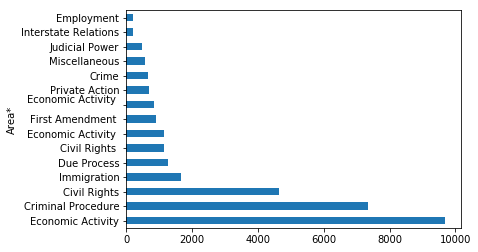

In [130]:
dfsoto= df_states[df_states['fixed_name'] == 'JUSTICE SOTOMAYOR'].groupby('Area*')['number_words'].sum().sort_values(ascending=False).plot(kind='barh')

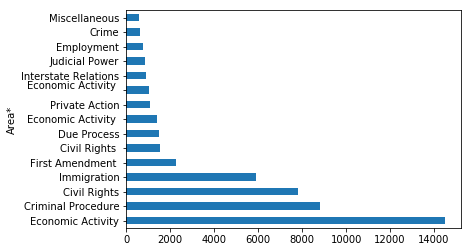

In [131]:
df_states[df_states['fixed_name'] == 'JUSTICE BREYER'].groupby('Area*')['number_words'].sum().sort_values(ascending=False).plot(kind='barh')

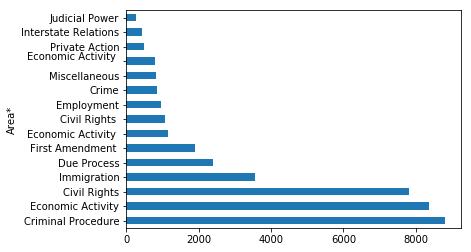

In [132]:
df_states[df_states['fixed_name'] == 'JUSTICE KAGAN'].groupby('Area*')['number_words'].sum().sort_values(ascending=False).plot(kind='barh')

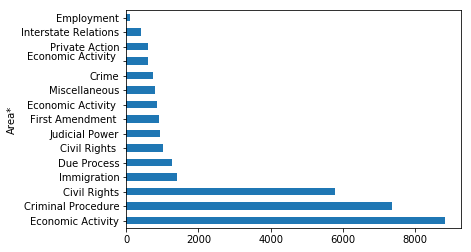

In [139]:
df_states[df_states['fixed_name'] == 'CHIEF JUSTICE ROBERTS'].groupby('Area*')['number_words'].sum().sort_values(ascending=False).plot(kind='barh')

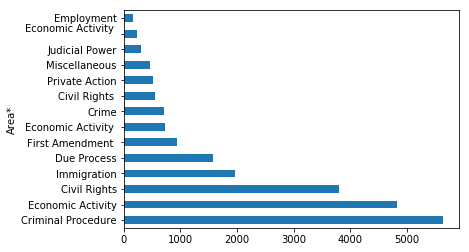

In [140]:
df_states[df_states['fixed_name'] == 'JUSTICE ALITO'].groupby('Area*')['number_words'].sum().sort_values(ascending=False).plot(kind='barh')

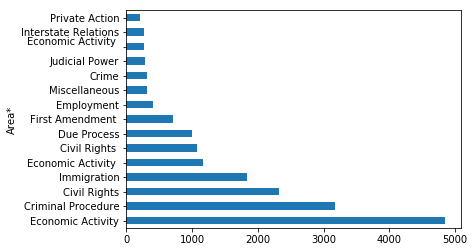

In [141]:
df_states[df_states['fixed_name'] == 'JUSTICE GINSBURG'].groupby('Area*')['number_words'].sum().sort_values(ascending=False).plot(kind='barh')

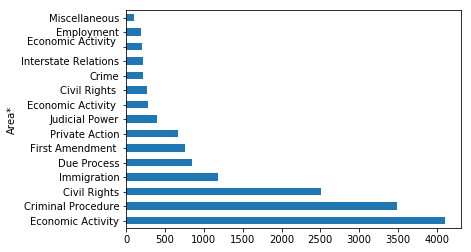

In [142]:
df_states[df_states['fixed_name'] == 'JUSTICE KENNEDY'].groupby('Area*')['number_words'].sum().sort_values(ascending=False).plot(kind='barh')

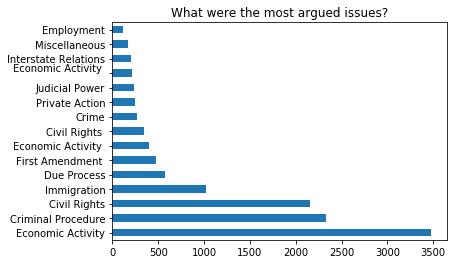

In [144]:
df_states['Area*'].value_counts().plot(kind='barh', title='What were the most argued issues?')

In [145]:
df_states['Docket Number'] = "16-373"
df_states.head()


,speaker,words,filenames,Case Name,Date Argued_x,Docket Number_x,Script,Docket Number2,fixed_name,number_words,...,Area*,Decision,Status,Court Leaning,Previous Court,City,Latitude,Longitude,Unnamed: 12,Docket Number
0,CHIEF JUSTICE ROBERTS:,We'll hear argument first this morning in C...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,CHIEF JUSTICE ROBERTS,18,...,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN,16-373
1,. ORAL ARGUMENT OF CHRISTOPHER LANDAU ON B...,"Thank you, Mr. Chief Justice, and may it pl...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,ORAL ARGUMENT OF CHRISTOPHER LANDAU ON BEHAL...,227,...,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN,16-373
2,.\n\n JUSTICE SOTOMAYOR:,I'm sorry --,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE SOTOMAYOR,3,...,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN,16-373
3,\n\n JUSTICE KENNEDY:,Just -- just as an\n\n introductory question...,16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,JUSTICE KENNEDY,71,...,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN,16-373
4,\n\n MR. LANDAU:,"I don't think they will be able\n\n to, Your...",16-399_3f14,Perry v. Merit Systems Protection Bd.,04/17/17,16-399.,16-399_3f14,16-399,MR LANDAU,35,...,Civil Rights,2017-07-02 00:00:00,Reversed,Liberal,District of Columbia Court of Appeals,"Washington, D.C.",38.907192,-77.036871,NaN,16-373


In [ ]:
#merge secondary sources onto original small dataframe with 64 rows 
# then remerge that onto this dataframe

In [ ]:
#group by case and see what words to get out, such as
# most frequent words per case, most frequent words by state
# pick a justice to track 
# see which justice spoke the most from case to case
# is it always the same justice?
# find the longest piece of speech by any justice in each case
# print it as a pull quote
#look at one sector 
# find longest script by anyone
# which case had the longest transcript? which was the most argued?
# which lawyer spoke the most out of all of them?

In [ ]:
# get a df that has one row per state
# get it to show what you want to roll over state
# article you want to show, a compression of columns and rows of readable text
# you want to compress by case and get an output for one case
# then you export it
# new column= the output from what you've discovered
# step one- group by state and count number of occurrences of speech for every justice
# step two- groupby justice for each case, do a value count to count the lines
# for each justice 

# new columns = case name, state name, speaker, count would make a new dataframe

In [ ]:
# df.groupby('critas')('asldkf').nunique()
# df1=df.groupby(adlk)('asdlkf').value_counts().reset_index(name='count')
# get to a 64 row thing for each case

# one- word frequency search in each case one by one for immigration
#     he did this in example 
    
# two- then do word frequency search to see what lines have word 'immigrant'
#     - how many lives have word immigrant

# third- build out column that has speaker and the words, row count would be as
# many lines that have the word in it 

# four-call it 'keyword'= immigrant, have a compressed ptag row that shows all
# lines immigrant is used 
# then have a single row for this case 
# look at who speaks the most by area 



# in next 24 hours try to compress to get some info for each case and have 
# a new dataframe that's 64 rows